In [67]:
#Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [68]:
os.getcwd()

'C:\\Users\\91909\\0 Real Project\\06. Predictive_model_ABC_Analysis'

In [69]:
sns.set_theme(context='notebook',
    style='whitegrid',
    palette='hls')

In [70]:
#Loading dataset
data = pd.read_csv(r'ABC_Analysis.csv')
data.head()

,Billed_Qty,Product_MRP,Offtake_unit,Product_Cost,Profit_Margin,Category
0,300,694.19,15,502.46,3332.1400,A
1,4,1056.00,1,200.00,3328.0000,A
2,8,729.06,1,380.56,2422.6624,A
3,10,1450.00,1,1160.00,2320.0000,A
4,2,2506.80,1,1339.29,2013.5904,A


In [71]:
a = pd.DataFrame(np.round(data.isnull().mean()*100,2),columns = ['Null_Percent'])
b = pd.DataFrame(data.isnull().sum(),columns = ['Null_Count'])
c = pd.DataFrame(data.dtypes,columns = ['Data_Type'])
d = pd.DataFrame(data.nunique(),columns = ['Nunique'])
e = pd.DataFrame(data.head(2).T)
e.columns = ['S1','S2']
info = pd.concat([a,b,c,d,e],axis =1)
info

,Null_Percent,Null_Count,Data_Type,Nunique,S1,S2
Billed_Qty,0.0,0,int64,69,300,4
Product_MRP,0.0,0,float64,1465,694.19,1056.0
Offtake_unit,0.0,0,int64,22,15,1
Product_Cost,0.0,0,float64,2230,502.46,200.0
Profit_Margin,0.0,0,float64,3048,3332.14,3328.0
Category,0.0,0,object,3,A,A


In [72]:
data.columns

Index(['Billed_Qty', 'Product_MRP', 'Offtake_unit', 'Product_Cost',
       'Profit_Margin', 'Category'],
      dtype='object')

In [73]:
data.shape

(6265, 6)

In [74]:
#Splitting data according to feature types',
continuous = ['Billed_Qty', 'Product_MRP', 'Offtake_unit', 'Product_Cost','Profit_Margin']

In [75]:
data.columns

Index(['Billed_Qty', 'Product_MRP', 'Offtake_unit', 'Product_Cost',
       'Profit_Margin', 'Category'],
      dtype='object')

In [76]:
data['Category'].value_counts()

Category
C    3253
A    1974
B    1038
Name: count, dtype: int64

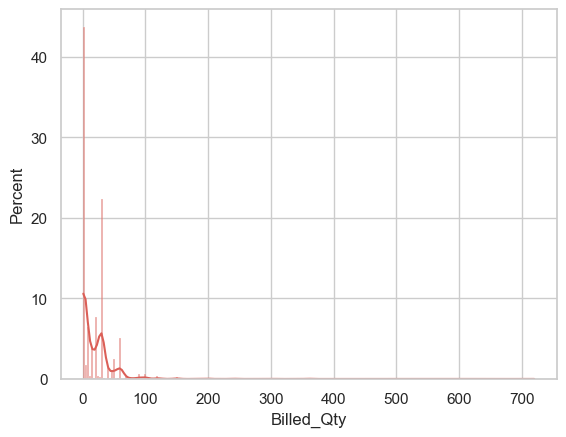

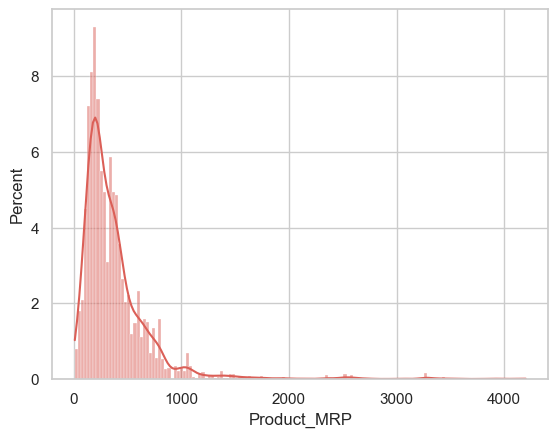

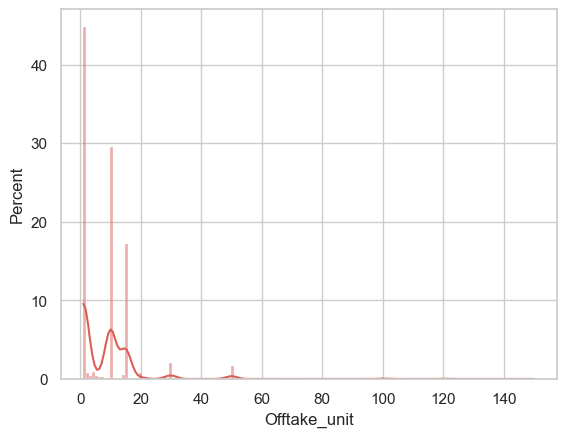

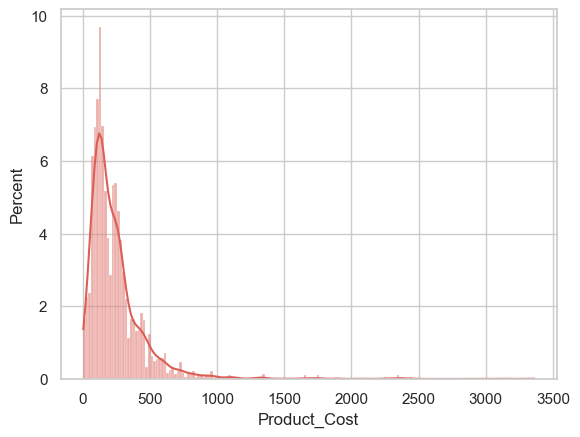

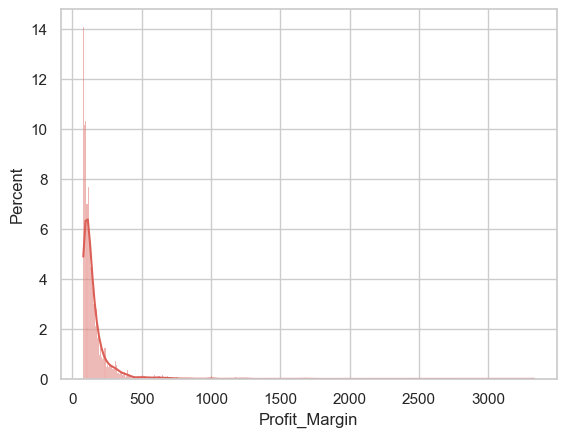

In [77]:
#Univariant Analysis
for i in continuous:
    sns.histplot(x = i,bins = 'auto',stat = 'percent',data = data,kde = True)
    plt.show()

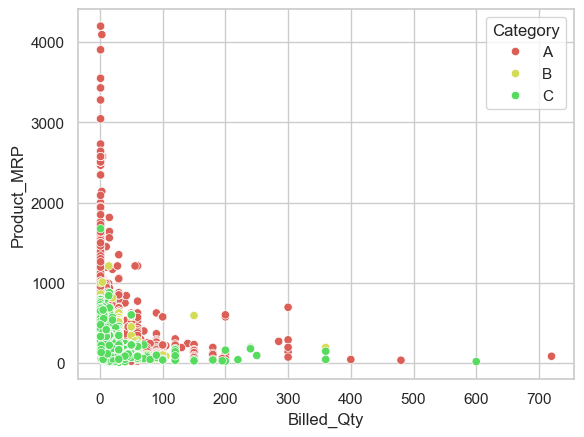

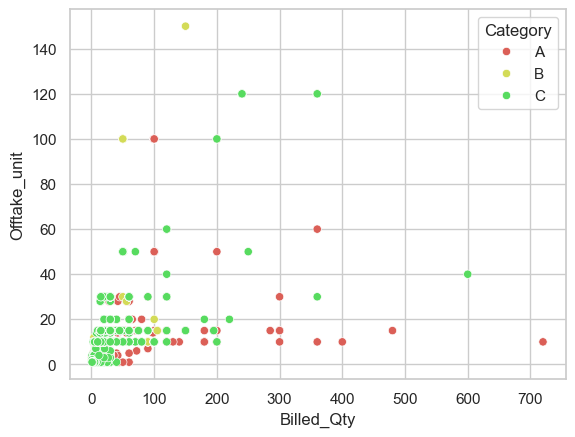

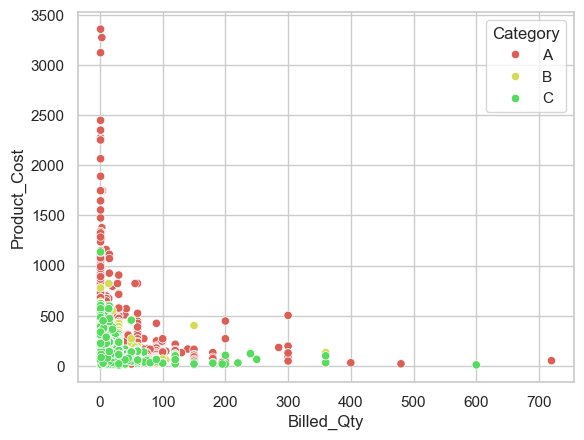

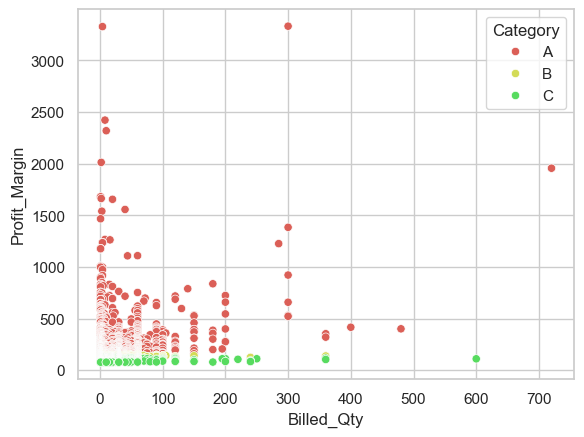

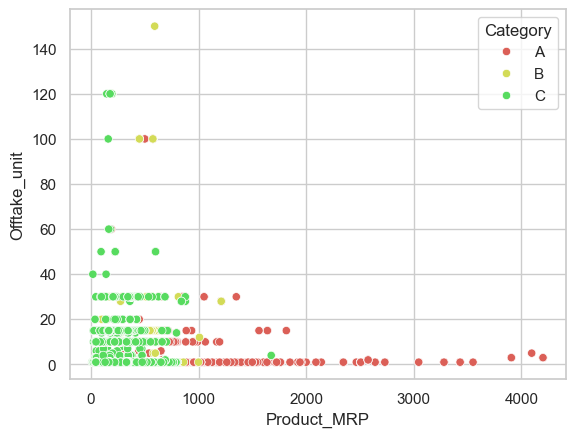

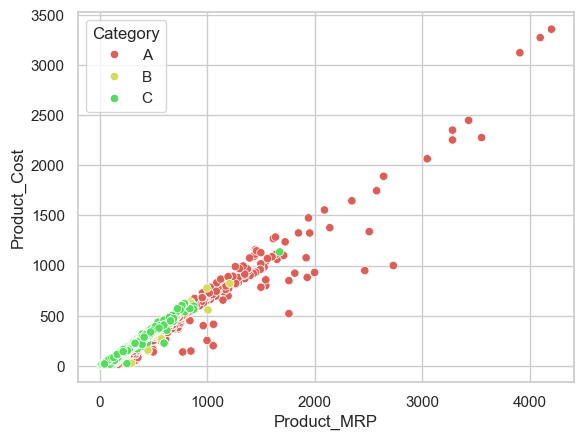

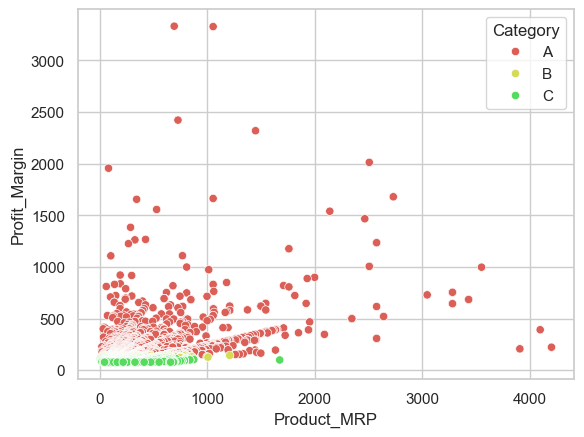

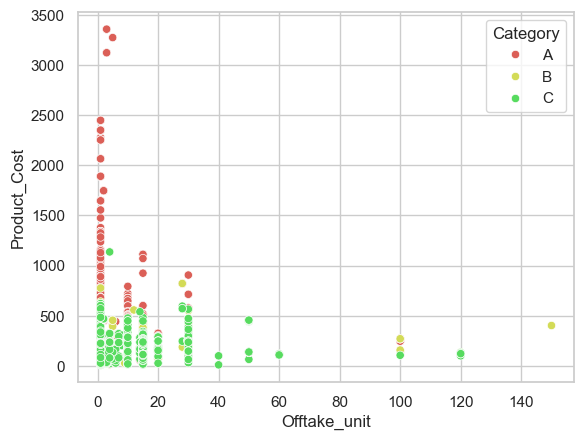

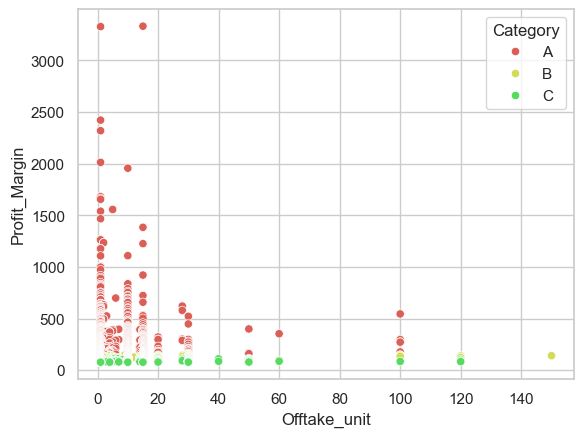

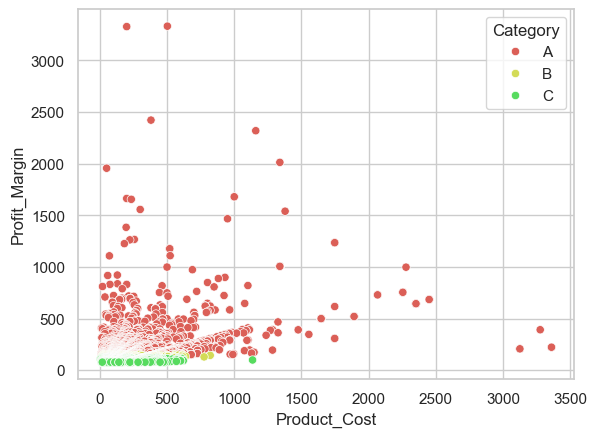

In [78]:
#Bivariant Analysis
for i in range(len(continuous)):
    for j in range(i+1,len(continuous)):
        sns.scatterplot(x = continuous[i],y = continuous[j],data = data,hue = 'Category')
        plt.show()

<Figure size 1000x1000 with 0 Axes>

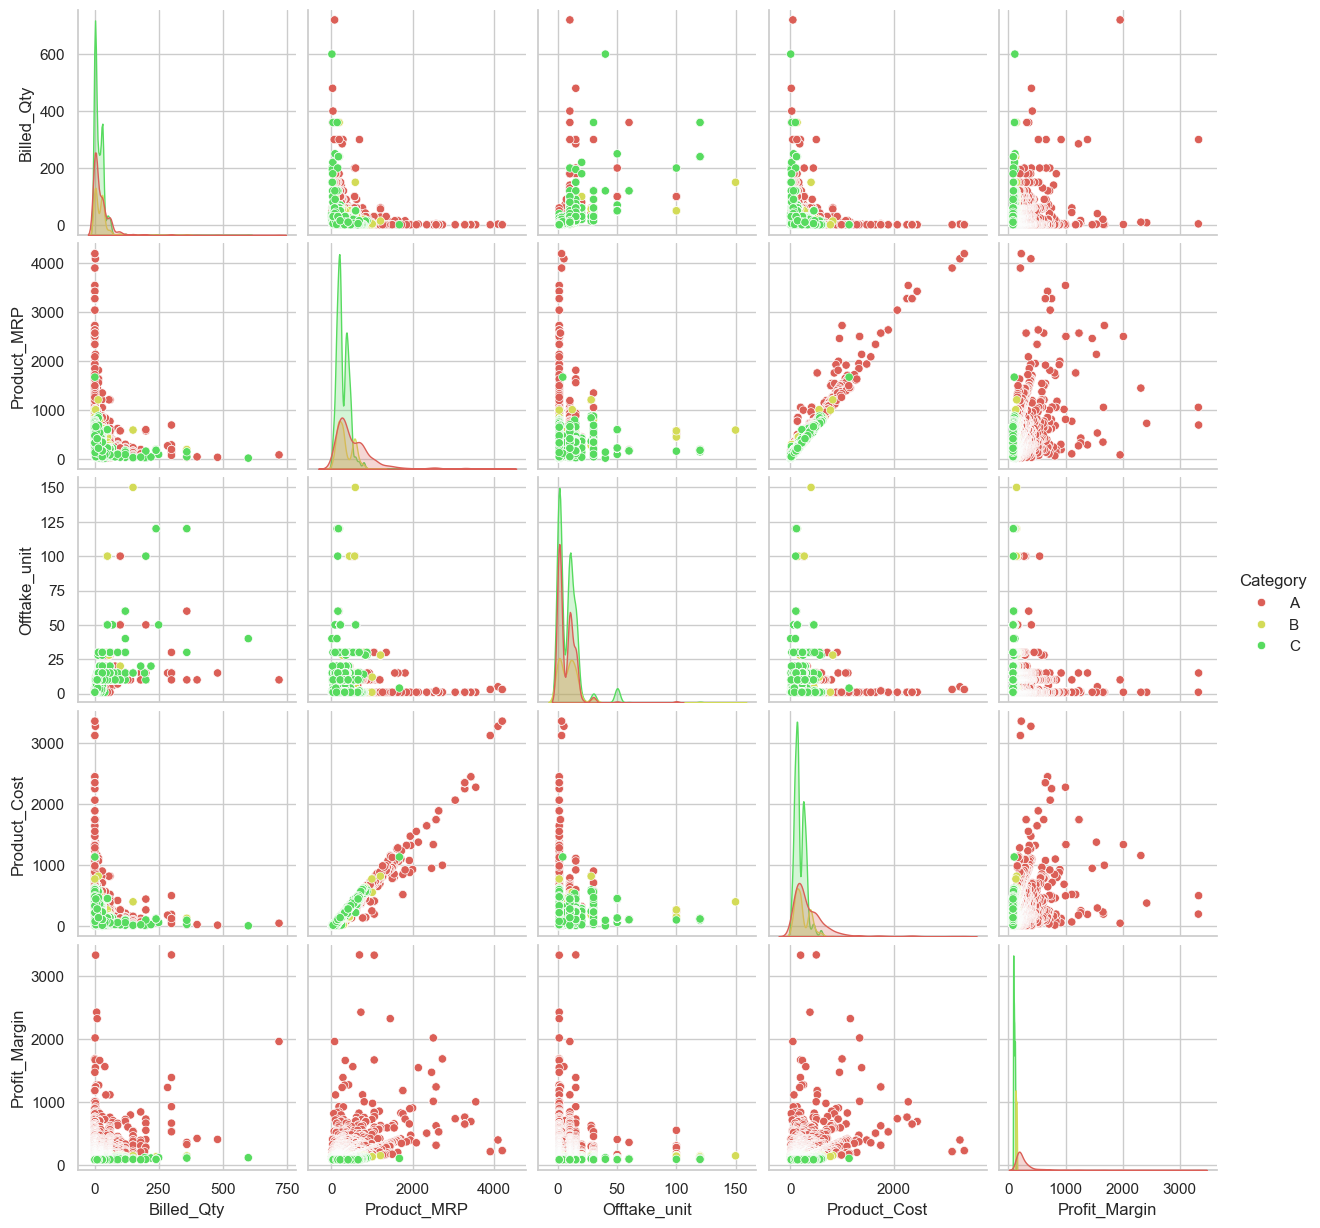

In [79]:
#Multivariant Analysis
plt.figure(figsize = (10,10))
sns.pairplot(data,hue = 'Category')
plt.show()

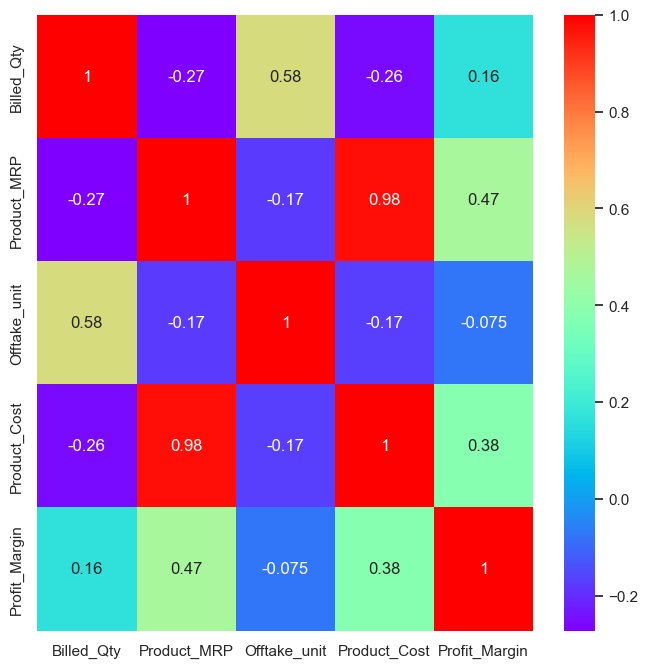

In [80]:
plt.figure(figsize = (8,8))
sns.heatmap(data[continuous].corr(),annot = True,cmap = 'rainbow')
plt.show()


In [81]:
data.drop(columns = ['Billed_Qty','Offtake_unit'],inplace = True)

In [82]:
continuous = ['Product_MRP', 'Product_Cost','Profit_Margin']

In [83]:
#Identifying feature and target
x = data.iloc[:,data.columns !='Category']
y = data[['Category']]

In [84]:
y

,Category
0,A
1,A
2,A
3,A
4,A
...,...
6260,C
6261,C
6262,C
6263,C


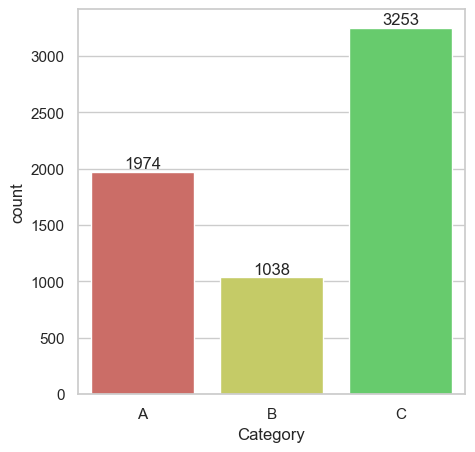

In [85]:
#Visualizing target
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'Category',data = data,hue = 'Category')
for i in ax.containers:
    ax.bar_label(i,fmt = '%d')
plt.show()

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [87]:
numeric_pipeline = Pipeline([
    ('continuous',StandardScaler())
])

In [88]:
from sklearn.compose import ColumnTransformer

In [89]:
preprocessor = ColumnTransformer([
    ('continuous',numeric_pipeline,continuous)
])

In [96]:
#Models library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [103]:
# **Define Multiple Models**
models = {
    "LogisticRegression": LogisticRegression(class_weight="balanced", random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    'GaussianNB':GaussianNB(),
    "SVM": SVC(class_weight="balanced", probability=True, random_state=42)
}

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
# **Train-Test Split**
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [114]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report,confusion_matrix


🔹 Training model: LogisticRegression
              precision    recall  f1-score   support

           A       1.00      0.96      0.98       395
           B       0.86      1.00      0.93       208
           C       1.00      0.98      0.99       650

    accuracy                           0.97      1253
   macro avg       0.95      0.98      0.96      1253
weighted avg       0.98      0.97      0.97      1253



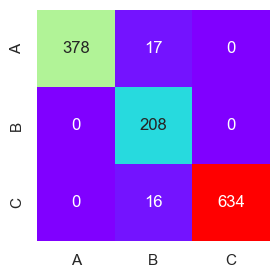

**************************************************

🔹 Training model: DecisionTree
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       395
           B       1.00      1.00      1.00       208
           C       1.00      1.00      1.00       650

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



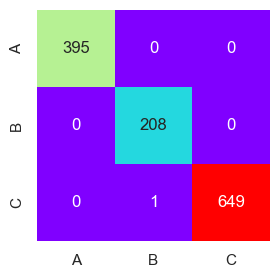

**************************************************

🔹 Training model: RandomForest
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       395
           B       1.00      1.00      1.00       208
           C       1.00      1.00      1.00       650

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



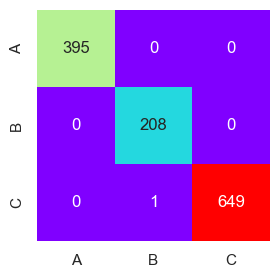

**************************************************

🔹 Training model: AdaBoost
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       395
           B       1.00      1.00      1.00       208
           C       1.00      1.00      1.00       650

    accuracy                           1.00      1253
   macro avg       1.00      1.00      1.00      1253
weighted avg       1.00      1.00      1.00      1253



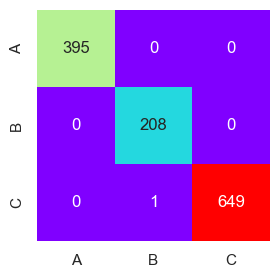

**************************************************

🔹 Training model: KNN
              precision    recall  f1-score   support

           A       0.99      0.98      0.99       395
           B       0.95      0.97      0.96       208
           C       0.99      0.99      0.99       650

    accuracy                           0.99      1253
   macro avg       0.98      0.98      0.98      1253
weighted avg       0.99      0.99      0.99      1253



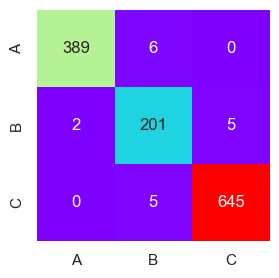

**************************************************

🔹 Training model: GaussianNB
              precision    recall  f1-score   support

           A       0.95      0.90      0.92       395
           B       0.77      0.98      0.86       208
           C       1.00      0.95      0.97       650

    accuracy                           0.94      1253
   macro avg       0.91      0.94      0.92      1253
weighted avg       0.95      0.94      0.94      1253



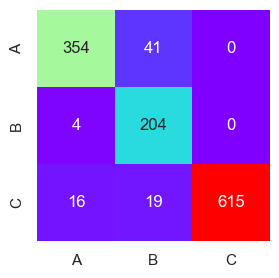

**************************************************

🔹 Training model: SVM
              precision    recall  f1-score   support

           A       1.00      0.97      0.98       395
           B       0.85      1.00      0.92       208
           C       1.00      0.96      0.98       650

    accuracy                           0.97      1253
   macro avg       0.95      0.98      0.96      1253
weighted avg       0.97      0.97      0.97      1253



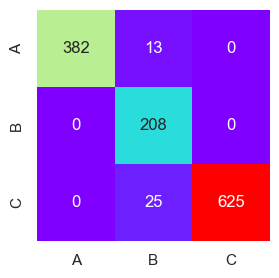

**************************************************


In [116]:
# **Loop through models and evaluate**
for name, model in models.items():
    print(f"\n🔹 Training model: {name}")

    # Full pipeline (Preprocessing → SMOTETomek → Model)
    model_pipeline = ImbPipeline([
        ("preprocessor", preprocessor),
        ("resampling", SMOTETomek(random_state=42)),  # Handles class imbalance
        ("classifier", model)
    ])

    # **Train model**
    model_pipeline.fit(xtrain, ytrain)

    # **Predictions & Evaluation**
    ypred = model_pipeline.predict(xtest)
    print(classification_report(ytest, ypred))
    plt.figure(figsize = (3,3))
    sns.heatmap(confusion_matrix(ytest,ypred),cmap = 'rainbow',annot = True,fmt = 'd',cbar = False,xticklabels=['A','B','C'],yticklabels=['A','B','C'])
    plt.show()
    print('*'*50)

In [117]:
mod_pipeline = ImbPipeline([
        ("preprocessor", preprocessor),
        ("resampling", SMOTETomek(random_state=42)),  # Handles class imbalance
        ("classifier", GaussianNB())
    ])

In [118]:
mod_pipeline.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('continuous',
                                                                   StandardScaler())]),
                                                  ['Product_MRP',
                                                   'Product_Cost',
                                                   'Profit_Margin'])])),
                ('resampling', SMOTETomek(random_state=42)),
                ('classifier', GaussianNB())])

In [119]:
ypred = model_pipeline.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           A       1.00      0.97      0.98       395
           B       0.85      1.00      0.92       208
           C       1.00      0.96      0.98       650

    accuracy                           0.97      1253
   macro avg       0.95      0.98      0.96      1253
weighted avg       0.97      0.97      0.97      1253



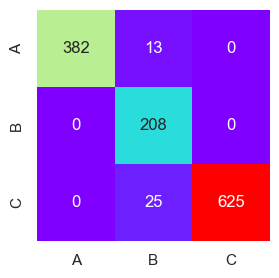

In [120]:
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(ytest,ypred),cmap = 'rainbow',annot = True,fmt = 'd',cbar = False,xticklabels=['A','B','C'],yticklabels=['A','B','C'])
plt.show()

In [121]:
import joblib

In [122]:
preprocessor = mod_pipeline.named_steps['preprocessor']
model = mod_pipeline.named_steps['classifier']

In [123]:
joblib.dump(preprocessor,'preprocessor.pkl')
joblib.dump(model,'model.pkl')

['model.pkl']